<a href="https://colab.research.google.com/github/SharanSaiVarshith/Applications-of-data-mining/blob/main/Lab_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
churn_df = pd.read_csv("/content/Logistic Regression _diabetes-dataset.csv")
churn_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
churn_df = churn_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']] # Removed the extra space in 'SkinThickness'
churn_df['churn'] = churn_df['Outcome'].astype('int') # Changed 'churn' to 'Outcome' as 'churn' column does not exist
churn_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,churn
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [4]:
churn_df.shape


(768, 10)

In [5]:
X = np.asarray(churn_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
X[0:5]

array([[  6. , 148. ,  72. ,  35. ,   0. ,  33.6],
       [  1. ,  85. ,  66. ,  29. ,   0. ,  26.6],
       [  8. , 183. ,  64. ,   0. ,   0. ,  23.3],
       [  1. ,  89. ,  66. ,  23. ,  94. ,  28.1],
       [  0. , 137. ,  40. ,  35. , 168. ,  43.1]])

In [6]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 0, 1, 0, 1])

In [7]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 6) (614,)
Test set: (154, 6) (154,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [9]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [10]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.67050029, 0.32949971],
       [0.7023805 , 0.2976195 ],
       [0.76766045, 0.23233955],
       [0.760163  , 0.239837  ],
       [0.76927935, 0.23072065],
       [0.52853159, 0.47146841],
       [0.53742027, 0.46257973],
       [0.34178978, 0.65821022],
       [0.25333137, 0.74666863],
       [0.57248446, 0.42751554],
       [0.83250978, 0.16749022],
       [0.7955042 , 0.2044958 ],
       [0.84979862, 0.15020138],
       [0.8132457 , 0.1867543 ],
       [0.6972638 , 0.3027362 ],
       [0.68940468, 0.31059532],
       [0.47038131, 0.52961869],
       [0.59889883, 0.40110117],
       [0.80855859, 0.19144141],
       [0.81981154, 0.18018846],
       [0.76486101, 0.23513899],
       [0.41876744, 0.58123256],
       [0.60481192, 0.39518808],
       [0.6012645 , 0.3987355 ],
       [0.53396392, 0.46603608],
       [0.79977289, 0.20022711],
       [0.68703691, 0.31296309],
       [0.18021359, 0.81978641],
       [0.83320881, 0.16679119],
       [0.64056742, 0.35943258],
       [0.

In [11]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, average='binary')

np.float64(0.25)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[16 36]
 [12 90]]


Confusion matrix, without normalization
[[16 36]
 [12 90]]


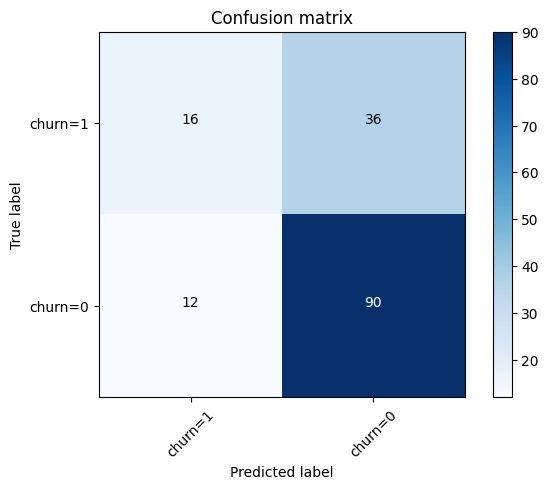

In [13]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')


In [14]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.71      0.88      0.79       102
           1       0.57      0.31      0.40        52

    accuracy                           0.69       154
   macro avg       0.64      0.60      0.59       154
weighted avg       0.67      0.69      0.66       154



In [15]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6068972492197541

In [16]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.60


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
